# Whether the Attendance Percentage in Formal Education and Unemployment Rate of the Household are affected by COVID - 19 and Whether the Attendance and Unemployment have Correlationship during COVID - 19 in Texas?

# How the attendance and unemployment distributed in FortWorthArlington County?

/Users/loah/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/loah/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


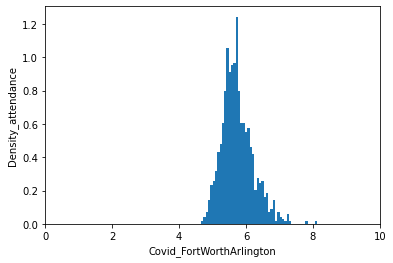

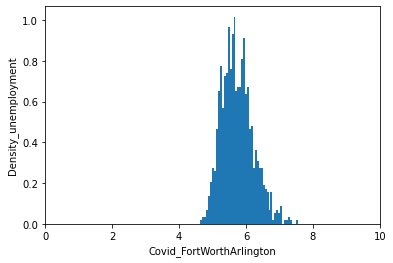

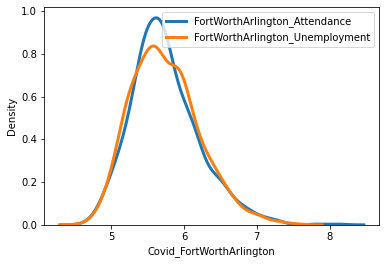

In [1]:
import math
import random
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

#Read and make arrays of the data in Fort Worth Arlington County.
df = pd.read_csv("DallasFortWorthArlington.csv")
data = "DallasFortWorthArlington.csv"
np.genfromtxt(data, delimiter = ",")
df.rename(columns={'nan':"dat"})

A = np.array(df["AttendancePercent"])
U = np.array(df["UnemploymentRate"])

C = np.array(df["CovidTotalCountyCases"])

samples = np.zeros(1000)
samples1 = np.zeros(1000)

#2t test with covid cases and the attendance percentages with 30 random samples.
for m in np.arange(0,1000,1):
    sample1 = random.sample(list(C),30)
    sample2 = random.sample(list(A),30)
    samples[m] = (np.mean(sample1)-np.mean(sample2))/np.sqrt(((np.std(sample1,ddof=29))**2+(np.std(sample2,ddof=29))**2)/30)

#2t test with covid cases and and the unemployment rates with 30 random samples.
for m in np.arange(0,1000,1):
    sample3 = random.sample(list(C),30)
    sample4 = random.sample(list(U),30)
    samples1[m] = (np.mean(sample3)-np.mean(sample4))/np.sqrt(((np.std(sample3,ddof=29))**2+(np.std(sample4,ddof=29))**2)/30)

#Plot 2t test with covid cases and the attendance percentages.
plt.subplot()
plt.hist(samples, density = True, bins = 50)
x = np.linspace(-1000,1000,100)
plt.xlabel("Covid_FortWorthArlington");plt.xlim(0,10)
plt.ylabel("Density_attendance")

#Plot 2t test with covid cases and the unemployment rates.
plt.subplots()
plt.hist(samples1, density = True, bins = 50)
x = np.linspace(-100,100,100)
plt.xlabel("Covid_FortWorthArlington");plt.xlim(0,10)
plt.ylabel("Density_unemployment")

#Combine 2 plotted distributions.
import seaborn as sns
plt.subplots()
sns.distplot(samples, hist= False, kde = True, kde_kws = {'linewidth' : 3}, label = 'FortWorthArlington_Attendance')
sns.distplot(samples1, hist= False, kde = True, kde_kws = {'linewidth' : 3}, label = 'FortWorthArlington_Unemployment')
plt.xlabel("Covid_FortWorthArlington")
plt.legend()

# How the relationship between the attendance and unemployment with COVID cases is formed in FortWorthArlington County by distingushing the average of the attendance?

Our intercept is  227095.40274430337 our slope1 12857.170917622898 our slope2 -21230.75349060641 and our slope3 is -749.2924906304324


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     67.29
Date:                Tue, 25 Oct 2022   Prob (F-statistic):           7.04e-19
Time:                        06:49:58   Log-Likelihood:                -641.21
No. Observations:                  62   AIC:                             1290.
Df Residuals:                      58   BIC:                             1299.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.271e+05   2.31e+04      9.832      0.000    1.81e+05    2.73e+05
x1          1.286e+04   3.18e+04      0.404      0.688   -5.09e+04    7.66e+04
x2         -2.123e+04   3296.572     -6.440      0.000   -2.78e+04   -1.46e+04
x3          -749.2925   4761.935     -0.157      0.876   -1.03e+04    8782.756
==============================================================================
Omnibus:                        2.536   Durbin-Watson:                   0.408
Prob(Omnibus):                  0.281   Jarque-Bera (JB):                2.007
Skew:                           0.438   Prob(JB):                        0.367
Kurtosis:                       3.090   Cond. No.                         288.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

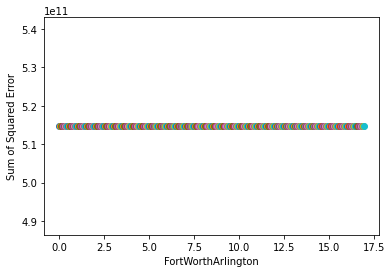

In [2]:
#Distinguish the attendacne percentage below and above average due to high attendance.
df['Group'] = df['AttendancePercent'] >= np.mean(A)
A_ = np.array(df["Group"])

#plot the covidcases = a*aboveaverageattendance + b*unemployment+ c*(aboveaverageattendance*unemployment).
y = C
x1 = A_
x2 = U
x0 = x1*x2

# Guess
a = 1
b = 2
c = 3
d = 4
predicted_y = a*x1 + b*x2 + c*x0 + d
for m in np.arange(0, 17, .05):
    predicted_y = a*x1 + b*x2 + c*x0
    err = predicted_y - y
    SSE = np.sum( err**2 )
    plt.plot(m, SSE, 'o')
plt.xlabel("FortWorthArlington")
plt.ylabel("Sum of Squared Error")
    
# Matrix
X = np.c_[np.ones(62),x1, x2, x0]

from numpy.linalg import inv
tmp = inv(np.matmul(np.transpose(X),X))

#solve the INTERCEPT, SLOPE1, SLOPE2 and SLOPE3 and analyze the graph.
INTERCEPT, SLOPE1, SLOPE2, SLOPE3 = tmp @ np.transpose(X) @ y
print("Our intercept is ",INTERCEPT, "our slope1", SLOPE1, "our slope2", SLOPE2, "and our slope3 is", SLOPE3)
import statsmodels.api as sm

model = sm.OLS(y,X).fit()
model.summary()

# With distingushing the average of the attendance, the relationship with unemployment and COVID cases in FortWorthArlington County is plotted.

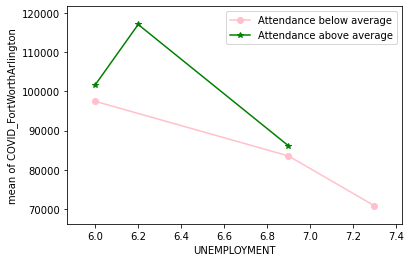

In [3]:
# Interaction Plot with unemployment rate and covid cases depending on the attendance.
from statsmodels.graphics.factorplots import interaction_plot
fig = interaction_plot(U, A_, C, colors = ['pink', 'green'], markers = ['o', '*'], xlabel = 'UNEMPLOYMENT', ylabel = 'COVID_FortWorthArlington')
plt.legend(['Attendance below average', 'Attendance above average'])
plt.show()

# How the attendance and unemployment distributed in Irving County?

/Users/loah/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/loah/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


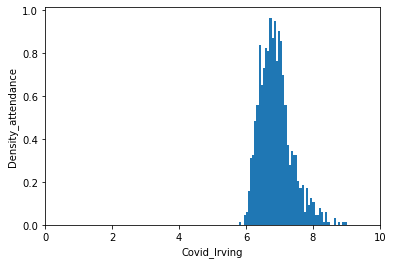

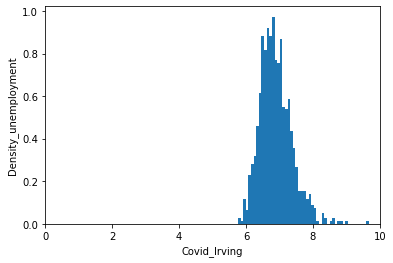

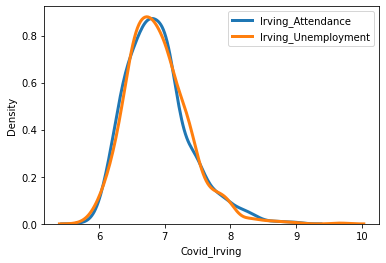

In [4]:
#Read and make arrays of the data in Irving County.
df1 = pd.read_csv("DallasIrving.csv")
data1 = "DallasIrving.csv"
np.genfromtxt(data, delimiter = ",")
df1.rename(columns={'nan':"dat"})

A1 = np.array(df1["AttendancePercent"])
U1 = np.array(df1["UnemploymentRate"])

C1 = np.array(df1["CovidTotalCountyCases"])

samples2 = np.zeros(1000)
samples3 = np.zeros(1000)

#2t test with covid cases and the attendance percentages with 30 random samples.
for m in np.arange(0,1000,1):
    sample5 = random.sample(list(C1),30)
    sample6 = random.sample(list(A1),30)
    samples2[m] = (np.mean(sample5)-np.mean(sample6))/np.sqrt(((np.std(sample5,ddof=29))**2+(np.std(sample6,ddof=29))**2)/30)

#2t test with covid cases and and the unemployment rates with 30 random samples.
for m in np.arange(0,1000,1):
    sample7 = random.sample(list(C1),30)
    sample8 = random.sample(list(U1),30)
    samples3[m] = (np.mean(sample7)-np.mean(sample8))/np.sqrt(((np.std(sample7,ddof=29))**2+(np.std(sample8,ddof=29))**2)/30)

#Plot 2t test with covid cases and the attendance percentages.
plt.subplot()
plt.hist(samples2, density = True, bins = 50)
x = np.linspace(-1000,1000,100)
plt.xlabel("Covid_Irving");plt.xlim(0,10)
plt.ylabel("Density_attendance")

#Plot 2t test with covid cases and the unemployment rates.
plt.subplots()
plt.hist(samples3, density = True, bins = 50)
x = np.linspace(-100,100,100)
plt.xlabel("Covid_Irving");plt.xlim(0,10)
plt.ylabel("Density_unemployment")

#Combine 2 plotted distributions.
import seaborn as sns
plt.subplots()
sns.distplot(samples2, hist= False, kde = True, kde_kws = {'linewidth' : 3}, label = 'Irving_Attendance')
sns.distplot(samples3, hist= False, kde = True, kde_kws = {'linewidth' : 3}, label = 'Irving_Unemployment')
plt.xlabel("Covid_Irving")
plt.legend()

# How the relationship between the attendance and unemployment with COVID cases is formed in Irving County by distingushing the average of the attendance?

Our intercept is  232965.5808679728 our slope1 -14070.360600945889 our slope2 -20773.24457595085 and our slope3 is 1263.1899643008219


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     12.68
Date:                Tue, 25 Oct 2022   Prob (F-statistic):           2.78e-06
Time:                        06:49:59   Log-Likelihood:                -580.35
No. Observations:                  54   AIC:                             1169.
Df Residuals:                      50   BIC:                             1177.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        2.33e+05   4.38e+04      5.316      0.000    1.45e+05    3.21e+05
x1         -1.407e+04   5.69e+04     -0.247      0.806   -1.28e+05       1e+05
x2         -2.077e+04   7228.877     -2.874      0.006   -3.53e+04   -6253.618
x3          1263.1900   9168.642      0.138      0.891   -1.72e+04    1.97e+04
==============================================================================
Omnibus:                        6.711   Durbin-Watson:                   0.195
Prob(Omnibus):                  0.035   Jarque-Bera (JB):                6.273
Skew:                           0.832   Prob(JB):                       0.0434
Kurtosis:                       3.141   Cond. No.                         306.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

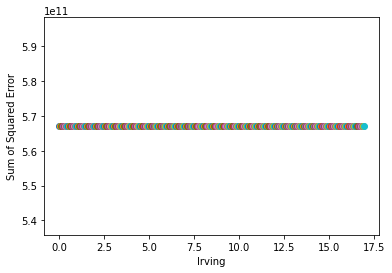

In [5]:
#Distinguish the attendacne percentage below and above average due to high attendance.
df1['Group'] = df1['AttendancePercent'] >= np.mean(A1)
A_1 = np.array(df1["Group"])

#plot the covidcases = a*aboveaverageattendance + b*unemployment+ c*(aboveaverageattendance*unemployment).
y = C1
x3 = A_1
x4 = U1
x01 = x3*x4

# Guess
a = 1
b = 2
c = 3
predicted_y = a*x3 + b*x4 + c*x01
for m in np.arange(0, 17, .05):
    predicted_y = a*x3 + b*x4 + c*x01
    err = predicted_y - y
    SSE = np.sum( err**2 )
    plt.plot(m, SSE, 'o')
plt.xlabel("Irving")
plt.ylabel("Sum of Squared Error")
    
# Matrix
X = np.c_[np.ones(54),x3, x4, x01]

from numpy.linalg import inv
tmp = inv(np.matmul(np.transpose(X),X))

#solve the INTERCEPT, SLOPE1, SLOPE2 and SLOPE3 and analyze the graph.
INTERCEPT, SLOPE1, SLOPE2, SLOPE3 = tmp @ np.transpose(X) @ y
print("Our intercept is ",INTERCEPT, "our slope1", SLOPE1, "our slope2", SLOPE2, "and our slope3 is", SLOPE3)
import statsmodels.api as sm

model = sm.OLS(y,X).fit()
model.summary()

# With distingushing the average of the attendance, the relationship with unemployment and COVID cases in Irving County is plotted.

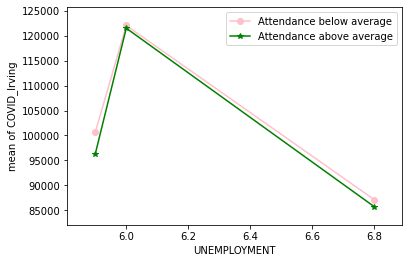

In [6]:
# Interaction Plot with unemployment rate and covid cases depending on the attendance.
from statsmodels.graphics.factorplots import interaction_plot
fig = interaction_plot(U1, A_1, C1, colors = ['pink', 'green'], markers = ['o', '*'], xlabel = 'UNEMPLOYMENT', ylabel = 'COVID_Irving')
plt.legend(['Attendance below average', 'Attendance above average'])
plt.show()

# How the attendance and unemployment distributed in ElPaso County?

/Users/loah/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/loah/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


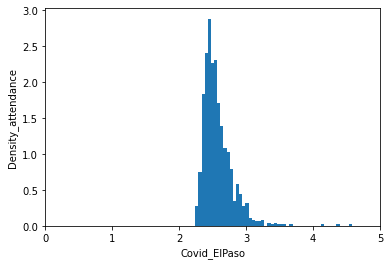

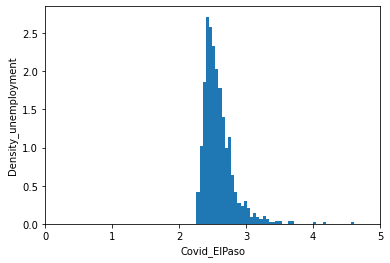

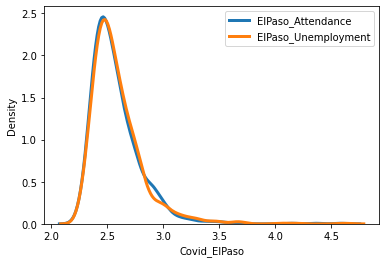

In [7]:
#Read and make arrays of the data in ElPaso County.
df2 = pd.read_csv("ElPaso.csv")
data2 = "ElPaso.csv"
np.genfromtxt(data, delimiter = ",")
df2.rename(columns={'nan':"dat"})

A2 = np.array(df2["AttendancePercent"])
U2 = np.array(df2["UnemploymentRate"])

C2 = np.array(df2["CovidTotalCountyCases"])

samples4 = np.zeros(1000)
samples5 = np.zeros(1000)

#2t test with covid cases and the attendance percentages with 30 random samples.
for m in np.arange(0,1000,1):
    sample9 = random.sample(list(C2),30)
    sample10 = random.sample(list(A2),30)
    samples4[m] = (np.mean(sample9)-np.mean(sample10))/np.sqrt(((np.std(sample9,ddof=29))**2+(np.std(sample10,ddof=29))**2)/30)

#2t test with covid cases and and the unemployment rates with 30 random samples.
for m in np.arange(0,1000,1):
    sample11 = random.sample(list(C2),30)
    sample12 = random.sample(list(U2),30)
    samples5[m] = (np.mean(sample11)-np.mean(sample12))/np.sqrt(((np.std(sample11,ddof=29))**2+(np.std(sample12,ddof=29))**2)/30)

#Plot 2t test with covid cases and the attendance percentages.
plt.subplot()
plt.hist(samples4, density = True, bins = 50)
x = np.linspace(-1000,1000,100)
plt.xlabel("Covid_ElPaso");plt.xlim(0,5)
plt.ylabel("Density_attendance")

#Plot 2t test with covid cases and the unemployment rates.
plt.subplots()
plt.hist(samples5, density = True, bins = 50)
x = np.linspace(-100,100,100)
plt.xlabel("Covid_ElPaso");plt.xlim(0,5)
plt.ylabel("Density_unemployment")

#Combine 2 plotted distributions.
import seaborn as sns
plt.subplots()
sns.distplot(samples4, hist= False, kde = True, kde_kws = {'linewidth' : 3}, label = 'ElPaso_Attendance')
sns.distplot(samples5, hist= False, kde = True, kde_kws = {'linewidth' : 3}, label = 'ElPaso_Unemployment')
plt.xlabel("Covid_ElPaso")
plt.legend()

# How the relationship between the attendance and unemployment with COVID cases is formed in ElPaso County by distingushing the average of the attendance?

Our intercept is  2097836.7560112616 our slope1 -20918.53621841404 our slope2 -247107.34909457213 and our slope3 is 2498.1603793414174


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     1.711
Date:                Tue, 25 Oct 2022   Prob (F-statistic):              0.178
Time:                        06:50:00   Log-Likelihood:                -534.48
No. Observations:                  49   AIC:                             1077.
Df Residuals:                      45   BIC:                             1085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.098e+06   3.76e+06      0.559      0.579   -5.47e+06    9.66e+06
x1         -2.092e+04   3.94e+04     -0.531      0.598      -1e+05    5.85e+04
x2         -2.471e+05   4.75e+05     -0.520      0.606    -1.2e+06     7.1e+05
x3          2498.1604   4985.088      0.501      0.619   -7542.323    1.25e+04
==============================================================================
Omnibus:                       29.324   Durbin-Watson:                   0.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.874
Skew:                           2.013   Prob(JB):                     2.44e-11
Kurtosis:                       5.781   Cond. No.                     1.42e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

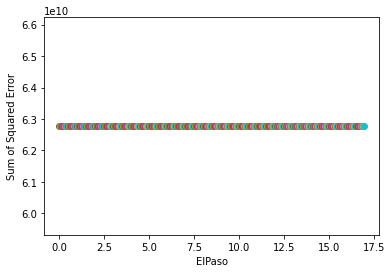

In [8]:
#Distinguish the attendacne percentage below and above average due to high attendance.
df2['Group'] = df2['AttendancePercent'] >= np.mean(A2)
A_2 = np.array(df2["Group"])

#plot the covidcases = a*aboveaverageattendance + b*unemployment+ c*(aboveaverageattendance*unemployment).
y = C2
x5 = A2
x6 = U2
x02 = x5*x6

# Guess
a = 1
b = 2
c = 3
predicted_y = a*x5 + b*x6 + c*x02
for m in np.arange(0, 17, .05):
    predicted_y = a*x5 + b*x6 + c*x02
    err = predicted_y - y
    SSE = np.sum( err**2 )
    plt.plot(m, SSE, 'o')
plt.xlabel("ElPaso")
plt.ylabel("Sum of Squared Error")
    
# Matrix
X = np.c_[np.ones(49),x5, x6, x02]

from numpy.linalg import inv
tmp = inv(np.matmul(np.transpose(X),X))

#solve the INTERCEPT, SLOPE1, SLOPE2 and SLOPE3 and analyze the graph.
INTERCEPT, SLOPE1, SLOPE2, SLOPE3 = tmp @ np.transpose(X) @ y
print("Our intercept is ",INTERCEPT, "our slope1", SLOPE1, "our slope2", SLOPE2, "and our slope3 is", SLOPE3)
import statsmodels.api as sm

model = sm.OLS(y,X).fit()
model.summary()

# With distingushing the average of the attendance, the relationship with unemployment and COVID cases in ElPaso County is plotted.

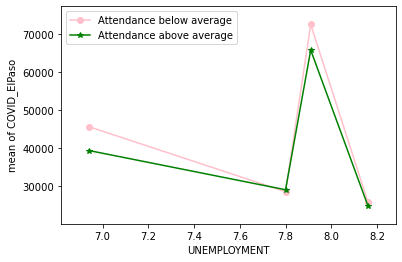

In [9]:
# Interaction Plot with unemployment rate and covid cases depending on the attendance.
from statsmodels.graphics.factorplots import interaction_plot
fig = interaction_plot(U2, A_2, C2, colors = ['pink', 'green'], markers = ['o', '*'], xlabel = 'UNEMPLOYMENT', ylabel = 'COVID_ElPaso')
plt.legend(['Attendance below average', 'Attendance above average'])
plt.show()

# How the attendance and unemployment distributed in Montogomery County?

/Users/loah/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/loah/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


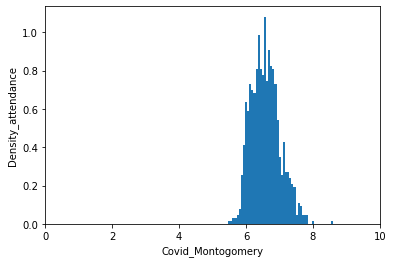

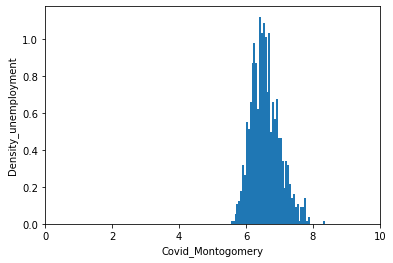

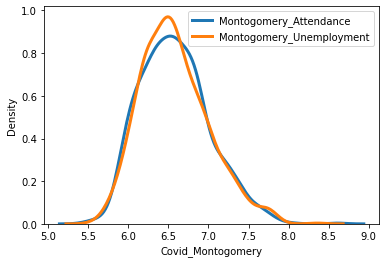

In [10]:
#Read and make arrays of the data in Montogomery County.
df3 = pd.read_csv("Montogomery.csv")
data3 = "Montogomery.csv"
np.genfromtxt(data, delimiter = ",")
df3.rename(columns={'nan':"dat"})

A3 = np.array(df3["AttendancePercent"])
U3 = np.array(df3["UnemploymentRate"])

C3 = np.array(df3["CovidTotalCountyCases"])


samples6 = np.zeros(1000)
samples7 = np.zeros(1000)

#2t test with covid cases and the attendance percentages with 30 random samples.
for m in np.arange(0,1000,1):
    sample13 = random.sample(list(C3),30)
    sample14 = random.sample(list(A3),30)
    samples6[m] = (np.mean(sample13)-np.mean(sample14))/np.sqrt(((np.std(sample13,ddof=29))**2+(np.std(sample14,ddof=29))**2)/30)

#2t test with covid cases and and the unemployment rates with 30 random samples.
for m in np.arange(0,1000,1):
    sample15 = random.sample(list(C3),30)
    sample16 = random.sample(list(U3),30)
    samples7[m] = (np.mean(sample15)-np.mean(sample16))/np.sqrt(((np.std(sample15,ddof=29))**2+(np.std(sample16,ddof=29))**2)/30)


#Plot 2t test with covid cases and the attendance percentages.
plt.subplot()
plt.hist(samples6, density = True, bins = 50)
x = np.linspace(-1000,1000,100)
plt.xlabel("Covid_Montogomery");plt.xlim(0,10)
plt.ylabel("Density_attendance")

#Plot 2t test with covid cases and the unemployment rates.
plt.subplots()
plt.hist(samples7, density = True, bins = 50)
x = np.linspace(-100,100,100)
plt.xlabel("Covid_Montogomery");plt.xlim(0,10)
plt.ylabel("Density_unemployment")

#Combine 2 plotted distributions.
import seaborn as sns
plt.subplots()
sns.distplot(samples6, hist= False, kde = True, kde_kws = {'linewidth' : 3}, label = 'Montogomery_Attendance')
sns.distplot(samples7, hist= False, kde = True, kde_kws = {'linewidth' : 3}, label = 'Montogomery_Unemployment')
plt.xlabel("Covid_Montogomery")
plt.legend()

# How the relationship between the attendance and unemployment with COVID cases is formed in Montogomery County?

Our intercept is  185260.33504591972 our slope1 85672.64604470295 our slope2 -15775.059103574216 and our slope3 is -12353.755897179171


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     90.45
Date:                Tue, 25 Oct 2022   Prob (F-statistic):           9.18e-20
Time:                        06:50:01   Log-Likelihood:                -506.95
No. Observations:                  52   AIC:                             1022.
Df Residuals:                      48   BIC:                             1030.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.853e+05    1.3e+04     14.227      0.000    1.59e+05    2.11e+05
x1          8.567e+04   2.79e+04      3.071      0.004    2.96e+04    1.42e+05
x2         -1.578e+04   1859.487     -8.484      0.000   -1.95e+04    -1.2e+04
x3         -1.235e+04   3792.638     -3.257      0.002      -2e+04   -4728.145
==============================================================================
Omnibus:                        1.191   Durbin-Watson:                   0.785
Prob(Omnibus):                  0.551   Jarque-Bera (JB):                1.029
Skew:                           0.336   Prob(JB):                        0.598
Kurtosis:                       2.851   Cond. No.                         387.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

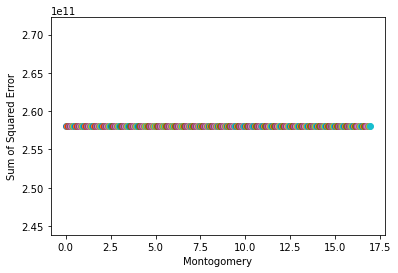

In [11]:
#Distinguish the attendacne percentage below and above average due to high attendance.
df3['Group'] = df3['AttendancePercent'] >= np.mean(A3)
A_3 = np.array(df3["Group"])

#plot the covidcases = a*aboveaverageattendance + b*unemployment+ c*(aboveaverageattendance*unemployment).
y = C3
x7 = A_3
x8 = U3
x03 = x7*x8

# Guess
a = 1
b = 2
c = 3
predicted_y = a*x7 + b*x8 + c*x03
for m in np.arange(0, 17, .05):
    predicted_y = a*x7 + b*x8 + c*x03
    err = predicted_y - y
    SSE = np.sum( err**2 )
    plt.plot(m, SSE, 'o')
plt.xlabel("Montogomery")
plt.ylabel("Sum of Squared Error")
    
# Matrix
X = np.c_[np.ones(52),x7, x8, x03]

from numpy.linalg import inv
tmp = inv(np.matmul(np.transpose(X),X))

#solve the INTERCEPT, SLOPE1, SLOPE2 and SLOPE3 and analyze the graph.
INTERCEPT, SLOPE1, SLOPE2, SLOPE3 = tmp @ np.transpose(X) @ y
print("Our intercept is ",INTERCEPT, "our slope1", SLOPE1, "our slope2", SLOPE2, "and our slope3 is", SLOPE3)
import statsmodels.api as sm

model = sm.OLS(y,X).fit()
model.summary()

# With distingushing the average of the attendance, the relationship with unemployment and COVID cases in Montogomery County is plotted.

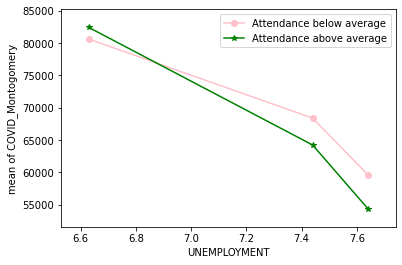

In [12]:
# Interaction Plot with unemployment rate and covid cases depending on the attendance.
from statsmodels.graphics.factorplots import interaction_plot
fig = interaction_plot(U3, A_3, C3, colors = ['pink', 'green'], markers = ['o', '*'], xlabel = 'UNEMPLOYMENT', ylabel = 'COVID_Montogomery')
plt.legend(['Attendance below average', 'Attendance above average'])
plt.show()

# How the attendance and unemployment distributed in Tarrant County?

/Users/loah/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/loah/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


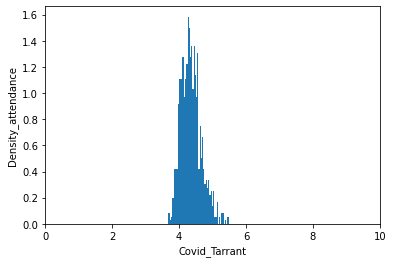

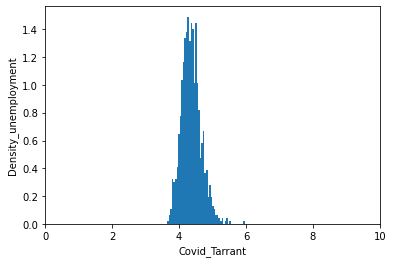

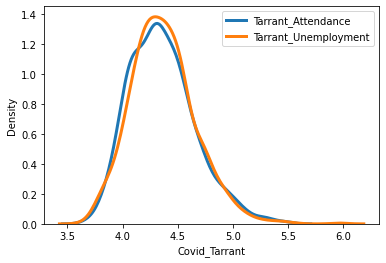

In [13]:
#Read and make arrays of the data in Tarrant County.
df4 = pd.read_csv("Tarrant.csv")
data4 = "Tarrant.csv"
np.genfromtxt(data, delimiter = ",")
df4.rename(columns={'nan':"dat"})

A4 = np.array(df4["AttendancePercent"])
U4 = np.array(df4["UnemploymentRate"])

C4 = np.array(df4["CovidTotalCountyCases"])


samples8 = np.zeros(1000)
samples9 = np.zeros(1000)

#2t test with covid cases and the attendance percentages with 30 random samples.
for m in np.arange(0,1000,1):
    sample17 = random.sample(list(C4),30)
    sample18 = random.sample(list(A4),30)
    samples8[m] = (np.mean(sample17)-np.mean(sample18))/np.sqrt(((np.std(sample17,ddof=29))**2+(np.std(sample18,ddof=29))**2)/30)

#2t test with covid cases and and the unemployment rates with 30 random samples.
for m in np.arange(0,1000,1):
    sample19 = random.sample(list(C4),30)
    sample20 = random.sample(list(U4),30)
    samples9[m] = (np.mean(sample19)-np.mean(sample20))/np.sqrt(((np.std(sample19,ddof=29))**2+(np.std(sample20,ddof=29))**2)/30)


#Plot 2t test with covid cases and the attendance percentages.
plt.subplot()
plt.hist(samples8, density = True, bins = 50)
x = np.linspace(-1000,1000,100)
plt.xlabel("Covid_Tarrant");plt.xlim(0,10)
plt.ylabel("Density_attendance")

#Plot 2t test with covid cases and the unemployment rates.
plt.subplots()
plt.hist(samples9, density = True, bins = 50)
x = np.linspace(-100,100,100)
plt.xlabel("Covid_Tarrant");plt.xlim(0,10)
plt.ylabel("Density_unemployment")

#Combine 2 plotted distributions.
import seaborn as sns
plt.subplots()
sns.distplot(samples8, hist= False, kde = True, kde_kws = {'linewidth' : 3}, label = 'Tarrant_Attendance')
sns.distplot(samples9, hist= False, kde = True, kde_kws = {'linewidth' : 3}, label = 'Tarrant_Unemployment')
plt.xlabel("Covid_Tarrant")
plt.legend()

# How the relationship between the attendance and unemployment with COVID cases is formed in Tarrant County?

Our intercept is  149850.58989271827 our slope1 32575.252580177243 our slope2 -13953.867681597712 and our slope3 is -5300.725028135683


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     46.83
Date:                Tue, 25 Oct 2022   Prob (F-statistic):           1.29e-15
Time:                        06:50:02   Log-Likelihood:                -644.25
No. Observations:                  63   AIC:                             1297.
Df Residuals:                      59   BIC:                             1305.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.499e+05   1.89e+04      7.921      0.000    1.12e+05    1.88e+05
x1          3.258e+04   3.38e+04      0.964      0.339    -3.5e+04       1e+05
x2         -1.395e+04   2930.120     -4.762      0.000   -1.98e+04   -8090.712
x3         -5300.7250   4844.823     -1.094      0.278    -1.5e+04    4393.743
==============================================================================
Omnibus:                        7.064   Durbin-Watson:                   0.113
Prob(Omnibus):                  0.029   Jarque-Bera (JB):                6.217
Skew:                           0.693   Prob(JB):                       0.0447
Kurtosis:                       3.668   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

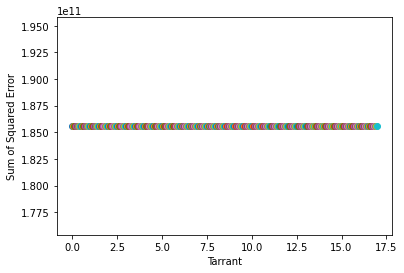

In [14]:
#Distinguish the attendacne percentage below and above average due to high attendance.
df4['Group'] = df4['AttendancePercent'] >= np.mean(A4)
A_4 = np.array(df4["Group"])

#plot the covidcases = a*aboveaverageattendance + b*unemployment+ c*(aboveaverageattendance*unemployment).
y = C4
x9 = A_4
x10 = U4
x04 = x9*x10

# Guess
a = 1
b = 2
c = 3
predicted_y = a*x9 + b*x10 + c*x04
for m in np.arange(0, 17, .05):
    predicted_y = a*x9 + b*x10 + c*x04
    err = predicted_y - y
    SSE = np.sum( err**2 )
    plt.plot(m, SSE, 'o')
plt.xlabel("Tarrant")
plt.ylabel("Sum of Squared Error")
    
# Matrix
X = np.c_[np.ones(63),x9, x10, x04]

from numpy.linalg import inv
tmp = inv(np.matmul(np.transpose(X),X))

#solve the INTERCEPT, SLOPE1, SLOPE2 and SLOPE3 and analyze the graph.
INTERCEPT, SLOPE1, SLOPE2, SLOPE3 = tmp @ np.transpose(X) @ y
print("Our intercept is ",INTERCEPT, "our slope1", SLOPE1, "our slope2", SLOPE2, "and our slope3 is", SLOPE3)
import statsmodels.api as sm

model = sm.OLS(y,X).fit()
model.summary()

# With distingushing the average of the attendance, the relationship with unemployment and COVID cases in Tarrant County is plotted.

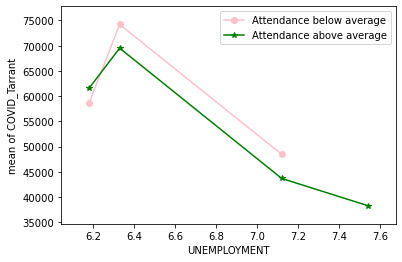

In [15]:
# Interaction Plot with unemployment rate and covid cases depending on the attendance.
from statsmodels.graphics.factorplots import interaction_plot
fig = interaction_plot(U4, A_4, C4, colors = ['pink', 'green'], markers = ['o', '*'], xlabel = 'UNEMPLOYMENT', ylabel = 'COVID_Tarrant')
plt.legend(['Attendance below average', 'Attendance above average'])
plt.show()

# How the attendance and unemployment distributed in Floyd County?

/Users/loah/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/loah/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


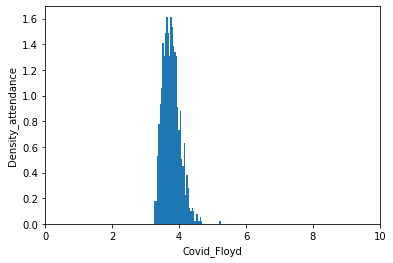

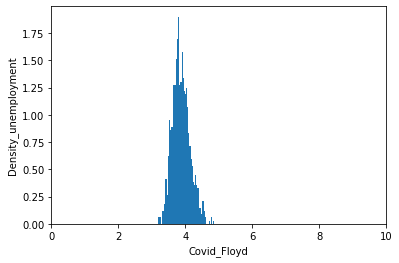

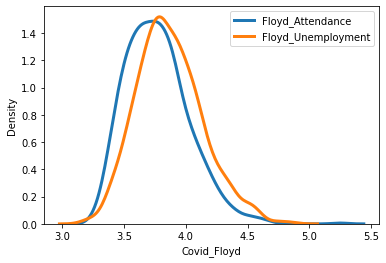

In [16]:
#Read and make arrays of the data in Floyd County.
df5 = pd.read_csv("Floyd.csv")
data5 = "Floyd.csv"
np.genfromtxt(data, delimiter = ",")
df5.rename(columns={'nan':"dat"})

A5 = np.array(df5["AttendancePercent"])
U5 = np.array(df5["UnemploymentRate"])

C5 = np.array(df5["CovidTotalCountyCases"])


samples10 = np.zeros(1000)
samples11 = np.zeros(1000)

#2t test with covid cases and the attendance percentages with 30 random samples.
for m in np.arange(0,1000,1):
    sample21 = random.sample(list(C5),30)
    sample22 = random.sample(list(A5),30)
    samples10[m] = (np.mean(sample21)-np.mean(sample22))/np.sqrt(((np.std(sample21,ddof=29))**2+(np.std(sample22,ddof=29))**2)/30)

#2t test with covid cases and and the unemployment rates with 30 random samples.
for m in np.arange(0,1000,1):
    sample23 = random.sample(list(C5),30)
    sample24 = random.sample(list(U5),30)
    samples11[m] = (np.mean(sample23)-np.mean(sample24))/np.sqrt(((np.std(sample23,ddof=29))**2+(np.std(sample24,ddof=29))**2)/30)


#Plot 2t test with covid cases and the attendance percentages.
plt.subplot()
plt.hist(samples10, density = True, bins = 50)
x = np.linspace(-1000,1000,100)
plt.xlabel("Covid_Floyd");plt.xlim(0,10)
plt.ylabel("Density_attendance")

#Plot 2t test with covid cases and the unemployment rates.
plt.subplots()
plt.hist(samples11, density = True, bins = 50)
x = np.linspace(-100,100,100)
plt.xlabel("Covid_Floyd");plt.xlim(0,10)
plt.ylabel("Density_unemployment")

#Combine 2 plotted distributions.
import seaborn as sns
plt.subplots()
sns.distplot(samples10, hist= False, kde = True, kde_kws = {'linewidth' : 3}, label = 'Floyd_Attendance')
sns.distplot(samples11, hist= False, kde = True, kde_kws = {'linewidth' : 3}, label = 'Floyd_Unemployment')
plt.xlabel("Covid_Floyd")
plt.legend()

# How the relationship between the attendance and unemployment with COVID cases is formed in Floyd County?

Our intercept is  18155.554578093197 our slope1 6982.586445644575 our slope2 -2383.0308046595283 and our slope3 is -1354.656649761317


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     13.12
Date:                Tue, 25 Oct 2022   Prob (F-statistic):           1.60e-06
Time:                        06:50:02   Log-Likelihood:                -479.19
No. Observations:                  57   AIC:                             966.4
Df Residuals:                      53   BIC:                             974.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.816e+04   4024.125      4.512      0.000    1.01e+04    2.62e+04
x1          6982.5864   6056.583      1.153      0.254   -5165.381    1.91e+04
x2         -2383.0308    787.890     -3.025      0.004   -3963.339    -802.723
x3         -1354.6566   1152.124     -1.176      0.245   -3665.525     956.212
==============================================================================
Omnibus:                       32.329   Durbin-Watson:                   0.116
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.289
Skew:                           1.929   Prob(JB):                     8.10e-14
Kurtosis:                       6.241   Cond. No.                         297.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

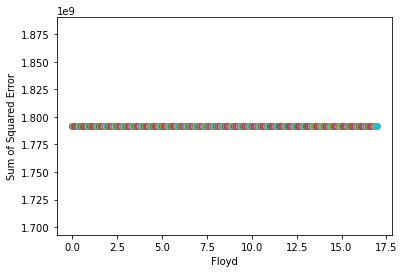

In [17]:
#Distinguish the attendacne percentage below and above average due to high attendance.
df5['Group'] = df5['AttendancePercent'] >= np.mean(A5)
A_5 = np.array(df5["Group"])

#plot the covidcases = a*aboveaverageattendance + b*unemployment+ c*(aboveaverageattendance*unemployment).
y = C5
x11 = A_5
x12 = U5
x05 = x11*x12

# Guess
a = 1
b = 2
c = 3
predicted_y = a*x11 + b*x12 + c*x05
for m in np.arange(0, 17, .05):
    predicted_y = a*x11 + b*x12 + c*x05
    err = predicted_y - y
    SSE = np.sum( err**2 )
    plt.plot(m, SSE, 'o')
plt.xlabel("Floyd")
plt.ylabel("Sum of Squared Error")
    
# Matrix
X = np.c_[np.ones(57),x11, x12, x05]

from numpy.linalg import inv
tmp = inv(np.matmul(np.transpose(X),X))

#solve the INTERCEPT, SLOPE1, SLOPE2 and SLOPE3 and analyze the graph.
INTERCEPT, SLOPE1, SLOPE2, SLOPE3 = tmp @ np.transpose(X) @ y
print("Our intercept is ",INTERCEPT, "our slope1", SLOPE1, "our slope2", SLOPE2, "and our slope3 is", SLOPE3)
import statsmodels.api as sm

model = sm.OLS(y,X).fit()
model.summary()

# With distingushing the average of the attendance, the relationship with unemployment and COVID cases in Floyd County is plotted.

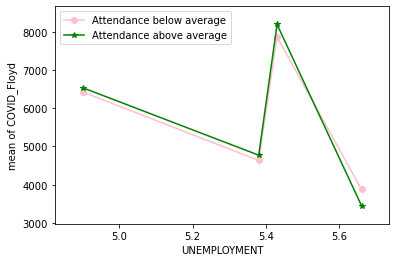

In [18]:
# Interaction Plot with unemployment rate and covid cases depending on the attendance.
from statsmodels.graphics.factorplots import interaction_plot
fig = interaction_plot(U5, A_5, C5, colors = ['pink', 'green'], markers = ['o', '*'], xlabel = 'UNEMPLOYMENT', ylabel = 'COVID_Floyd')
plt.legend(['Attendance below average', 'Attendance above average'])
plt.show()

# How the attendance and unemployment distributed in Burleson County?

/Users/loah/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/loah/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


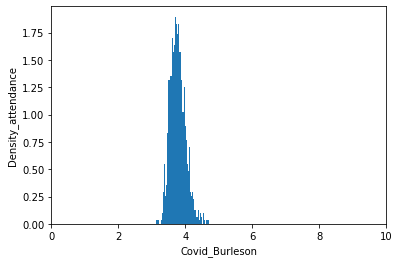

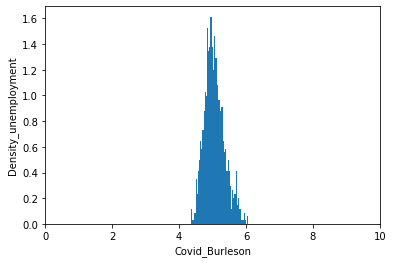

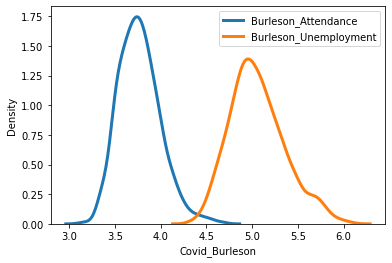

In [19]:
#Read and make arrays of the data in Burleson County.
df6 = pd.read_csv("Burleson.csv")
data6 = "Burleson.csv"
np.genfromtxt(data, delimiter = ",")
df6.rename(columns={'nan':"dat"})

A6 = np.array(df6["AttendancePercent"])
U6 = np.array(df6["UnemploymentRate"])

C6 = np.array(df6["CovidTotalCountyCases"])


samples12 = np.zeros(1000)
samples13 = np.zeros(1000)

#2t test with covid cases and the attendance percentages with 30 random samples.
for m in np.arange(0,1000,1):
    sample25 = random.sample(list(C6),30)
    sample26 = random.sample(list(A6),30)
    samples12[m] = (np.mean(sample25)-np.mean(sample26))/np.sqrt(((np.std(sample25,ddof=29))**2+(np.std(sample26,ddof=29))**2)/30)

#2t test with covid cases and and the unemployment rates with 30 random samples.
for m in np.arange(0,1000,1):
    sample27 = random.sample(list(C6),30)
    sample28 = random.sample(list(U6),30)
    samples13[m] = (np.mean(sample27)-np.mean(sample28))/np.sqrt(((np.std(sample27,ddof=29))**2+(np.std(sample28,ddof=29))**2)/30)


#Plot 2t test with covid cases and the attendance percentages.
plt.subplot()
plt.hist(samples12, density = True, bins = 50)
x = np.linspace(-1000,1000,100)
plt.xlabel("Covid_Burleson");plt.xlim(0,10)
plt.ylabel("Density_attendance")

#Plot 2t test with covid cases and the unemployment rates.
plt.subplots()
plt.hist(samples13, density = True, bins = 50)
x = np.linspace(-100,100,100)
plt.xlabel("Covid_Burleson");plt.xlim(0,10)
plt.ylabel("Density_unemployment")

#Combine 2 plotted distributions.
import seaborn as sns
plt.subplots()
sns.distplot(samples12, hist= False, kde = True, kde_kws = {'linewidth' : 3}, label = 'Burleson_Attendance')
sns.distplot(samples13, hist= False, kde = True, kde_kws = {'linewidth' : 3}, label = 'Burleson_Unemployment')
plt.xlabel("Covid_Burleson")
plt.legend()

# How the relationship between the attendance and unemployment with COVID cases is formed in Burleson County?

Our intercept is  1104.919386964103 our slope1 -8.551904310106238 our slope2 -122.52036497514835 and our slope3 is 2.03642804491065


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     28.96
Date:                Tue, 25 Oct 2022   Prob (F-statistic):           3.76e-11
Time:                        06:50:03   Log-Likelihood:                -290.53
No. Observations:                  56   AIC:                             589.1
Df Residuals:                      52   BIC:                             597.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1104.9194    133.642      8.268      0.000     836.747    1373.091
x1            -8.5519    169.782     -0.050      0.960    -349.244     332.141
x2          -122.5204     21.434     -5.716      0.000    -165.530     -79.511
x3             2.0364     27.604      0.074      0.941     -53.355      57.427
==============================================================================
Omnibus:                        7.318   Durbin-Watson:                   0.155
Prob(Omnibus):                  0.026   Jarque-Bera (JB):                6.396
Skew:                           0.752   Prob(JB):                       0.0409
Kurtosis:                       3.690   Cond. No.                         251.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

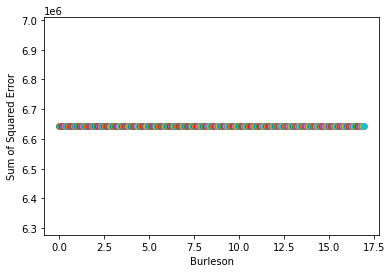

In [20]:
#Distinguish the attendacne percentage below and above average due to high attendance.
df6['Group'] = df6['AttendancePercent'] >= np.mean(A6)
A_6 = np.array(df6["Group"])

#plot the covidcases = a*aboveaverageattendance + b*unemployment+ c*(aboveaverageattendance*unemployment).
y = C6
x13 = A_6
x14 = U6
x06 = x13*x14

# Guess
a = 1
b = 2
c = 3
predicted_y = a*x13 + b*x14 + c*x06
for m in np.arange(0, 17, .05):
    predicted_y = a*x13 + b*x14 + c*x06
    err = predicted_y - y
    SSE = np.sum( err**2 )
    plt.plot(m, SSE, 'o')
plt.xlabel("Burleson")
plt.ylabel("Sum of Squared Error")
    
# Matrix
X = np.c_[np.ones(56),x13, x14, x06]

from numpy.linalg import inv
tmp = inv(np.matmul(np.transpose(X),X))

#solve the INTERCEPT, SLOPE1, SLOPE2 and SLOPE3 and analyze the graph.
INTERCEPT, SLOPE1, SLOPE2, SLOPE3 = tmp @ np.transpose(X) @ y
print("Our intercept is ",INTERCEPT, "our slope1", SLOPE1, "our slope2", SLOPE2, "and our slope3 is", SLOPE3)
import statsmodels.api as sm

model = sm.OLS(y,X).fit()
model.summary()

# With distingushing the average of the attendance, the relationship with unemployment and COVID cases in Burleson County is plotted.

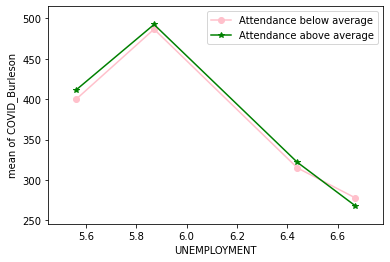

In [21]:
# Interaction Plot with unemployment rate and covid cases depending on the attendance.
from statsmodels.graphics.factorplots import interaction_plot
fig = interaction_plot(U6, A_6, C6, colors = ['pink', 'green'], markers = ['o', '*'], xlabel = 'UNEMPLOYMENT', ylabel = 'COVID_Burleson')
plt.legend(['Attendance below average', 'Attendance above average'])
plt.show()

# How the attendance and unemployment distributed in Harris County?

/Users/loah/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/loah/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


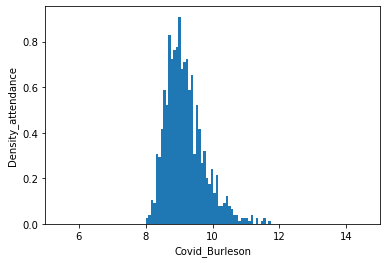

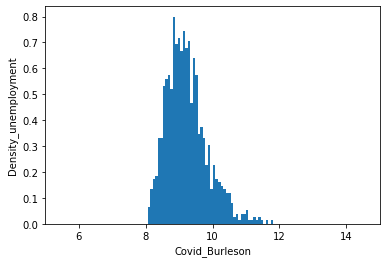

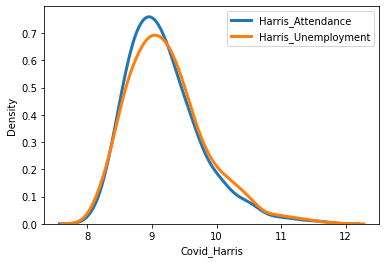

In [22]:
#Read and make arrays of the data in Harris County.
df7 = pd.read_csv("Harris.csv")
data7 = "Harris.csv"
np.genfromtxt(data, delimiter = ",")
df7.rename(columns={'nan':"dat"})

A7 = np.array(df7["AttendancePercent"])
U7 = np.array(df7["UnemploymentRate"])

C7 = np.array(df7["CovidTotalCountyCases"])


samples14 = np.zeros(1000)
samples15 = np.zeros(1000)

#2t test with covid cases and the attendance percentages with 30 random samples.
for m in np.arange(0,1000,1):
    sample29 = random.sample(list(C7),30)
    sample30 = random.sample(list(A7),30)
    samples14[m] = (np.mean(sample29)-np.mean(sample30))/np.sqrt(((np.std(sample29,ddof=29))**2+(np.std(sample30,ddof=29))**2)/30)

#2t test with covid cases and and the unemployment rates with 30 random samples.
for m in np.arange(0,1000,1):
    sample31 = random.sample(list(C7),30)
    sample32 = random.sample(list(U7),30)
    samples15[m] = (np.mean(sample31)-np.mean(sample32))/np.sqrt(((np.std(sample31,ddof=29))**2+(np.std(sample32,ddof=29))**2)/30)


#Plot 2t test with covid cases and the attendance percentages.
plt.subplot()
plt.hist(samples14, density = True, bins = 50)
x = np.linspace(-1000,1000,100)
plt.xlabel("Covid_Burleson");plt.xlim(5,15)
plt.ylabel("Density_attendance")

#Plot 2t test with covid cases and the unemployment rates.
plt.subplots()
plt.hist(samples15, density = True, bins = 50)
x = np.linspace(-100,100,100)
plt.xlabel("Covid_Burleson");plt.xlim(5,15)
plt.ylabel("Density_unemployment")

#Combine 2 plotted distributions.
import seaborn as sns
plt.subplots()
sns.distplot(samples14, hist= False, kde = True, kde_kws = {'linewidth' : 3}, label = 'Harris_Attendance')
sns.distplot(samples15, hist= False, kde = True, kde_kws = {'linewidth' : 3}, label = 'Harris_Unemployment')
plt.xlabel("Covid_Harris")
plt.legend()

# How the relationship between the attendance and unemployment with COVID cases is formed in Harris County?

Our intercept is  228987.24575745253 our slope1 98579.00676540486 our slope2 -9467.29816050706 and our slope3 is -12265.964217290719


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     44.33
Date:                Tue, 25 Oct 2022   Prob (F-statistic):           3.56e-12
Time:                        06:50:04   Log-Likelihood:                -412.68
No. Observations:                  40   AIC:                             833.4
Df Residuals:                      36   BIC:                             840.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        2.29e+05    2.3e+04      9.953      0.000    1.82e+05    2.76e+05
x1          9.858e+04   3.15e+04      3.133      0.003    3.48e+04    1.62e+05
x2         -9467.2982   2821.919     -3.355      0.002   -1.52e+04   -3744.181
x3         -1.227e+04   3723.752     -3.294      0.002   -1.98e+04   -4713.846
==============================================================================
Omnibus:                        7.256   Durbin-Watson:                   0.895
Prob(Omnibus):                  0.027   Jarque-Bera (JB):                5.944
Skew:                           0.853   Prob(JB):                       0.0512
Kurtosis:                       3.812   Cond. No.                         297.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

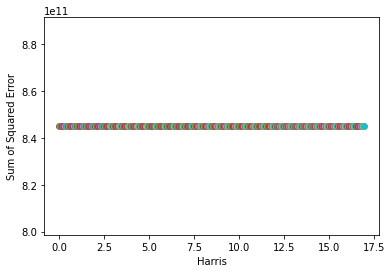

In [23]:
#Distinguish the attendacne percentage below and above average due to high attendance.
df7['Group'] = df7['AttendancePercent'] >= np.mean(A7)
A_7 = np.array(df7["Group"])

#plot the covidcases = a*aboveaverageattendance + b*unemployment+ c*(aboveaverageattendance*unemployment).
y = C7
x15 = A_7
x16 = U7
x07 = x15*x16

# Guess
a = 1
b = 2
c = 3
predicted_y = a*x15 + b*x16 + c*x07
for m in np.arange(0, 17, .05):
    predicted_y = a*x15 + b*x16 + c*x07
    err = predicted_y - y
    SSE = np.sum( err**2 )
    plt.plot(m, SSE, 'o')
plt.xlabel("Harris")
plt.ylabel("Sum of Squared Error")
    
# Matrix
X = np.c_[np.ones(40),x15, x16, x07]

from numpy.linalg import inv
tmp = inv(np.matmul(np.transpose(X),X))

#solve the INTERCEPT, SLOPE1, SLOPE2 and SLOPE3 and analyze the graph.
INTERCEPT, SLOPE1, SLOPE2, SLOPE3 = tmp @ np.transpose(X) @ y
print("Our intercept is ",INTERCEPT, "our slope1", SLOPE1, "our slope2", SLOPE2, "and our slope3 is", SLOPE3)
import statsmodels.api as sm

model = sm.OLS(y,X).fit()
model.summary()

# With distingushing the average of the attendance, the relationship with unemployment and COVID cases in Harris County is plotted.

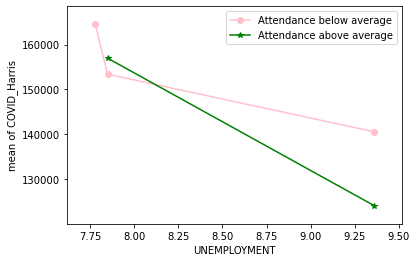

In [24]:
# Interaction Plot with unemployment rate and covid cases depending on the attendance.
from statsmodels.graphics.factorplots import interaction_plot
fig = interaction_plot(U7, A_7, C7, colors = ['pink', 'green'], markers = ['o', '*'], xlabel = 'UNEMPLOYMENT', ylabel = 'COVID_Harris')
plt.legend(['Attendance below average', 'Attendance above average'])
plt.show()

# Comparing t attendance distribution with various counties.

/Users/loah/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/loah/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/loah/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function w

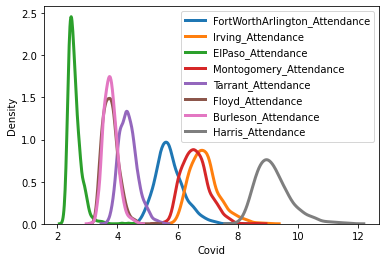

In [25]:
#Plot t distribution of attendance percentages and covid cases with all counties.
import seaborn as sns
plt.subplots()
sns.distplot(samples, hist= False, kde = True, kde_kws = {'linewidth' : 3}, label = 'FortWorthArlington_Attendance')
sns.distplot(samples2, hist= False, kde = True, kde_kws = {'linewidth' : 3}, label = 'Irving_Attendance')
sns.distplot(samples4, hist= False, kde = True, kde_kws = {'linewidth' : 3}, label = 'ElPaso_Attendance')
sns.distplot(samples6, hist= False, kde = True, kde_kws = {'linewidth' : 3}, label = 'Montogomery_Attendance')
sns.distplot(samples8, hist= False, kde = True, kde_kws = {'linewidth' : 3}, label = 'Tarrant_Attendance')
sns.distplot(samples10, hist= False, kde = True, kde_kws = {'linewidth' : 3}, label = 'Floyd_Attendance')
sns.distplot(samples12, hist= False, kde = True, kde_kws = {'linewidth' : 3}, label = 'Burleson_Attendance')
sns.distplot(samples14, hist= False, kde = True, kde_kws = {'linewidth' : 3}, label = 'Harris_Attendance')

plt.xlabel("Covid")
plt.legend()

# Comparing t unemployment distribution with various counties.

/Users/loah/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/loah/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/loah/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function w

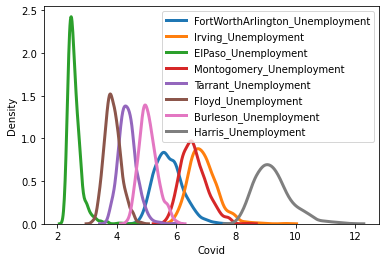

In [26]:
#Plot t distribution of unemployment rates and covid cases with all counties.
import seaborn as sns
plt.subplots()
sns.distplot(samples1, hist= False, kde = True, kde_kws = {'linewidth' : 3}, label = 'FortWorthArlington_Unemployment')
sns.distplot(samples3, hist= False, kde = True, kde_kws = {'linewidth' : 3}, label = 'Irving_Unemployment')
sns.distplot(samples5, hist= False, kde = True, kde_kws = {'linewidth' : 3}, label = 'ElPaso_Unemployment')
sns.distplot(samples7, hist= False, kde = True, kde_kws = {'linewidth' : 3}, label = 'Montogomery_Unemployment')
sns.distplot(samples9, hist= False, kde = True, kde_kws = {'linewidth' : 3}, label = 'Tarrant_Unemployment')
sns.distplot(samples11, hist= False, kde = True, kde_kws = {'linewidth' : 3}, label = 'Floyd_Unemployment')
sns.distplot(samples13, hist= False, kde = True, kde_kws = {'linewidth' : 3}, label = 'Burleson_Unemployment')
sns.distplot(samples15, hist= False, kde = True, kde_kws = {'linewidth' : 3}, label = 'Harris_Unemployment')

plt.xlabel("Covid")
plt.legend()